In [1]:
import time
import ROOT
import math
import numpy as np
import pandas as pd
import root_numpy
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib.colors import LogNorm

Welcome to JupyROOT 6.22/02


In [2]:
def getData(inputFiles):
    data = root_numpy.root2array(inputFiles, "Tree", \
                                 branches=['evid','xsec','ntrials','pt_jet', 'p_jet', 'eta_jet', 'phi_jet', 'theta_jet'])
    return pd.DataFrame(data)

In [3]:
def applyCut(inputDataframe, cut, text=None):
    dataframe = inputDataframe
    nbeforecut = dataframe.shape[0]
    cutDataframe = dataframe.query(cut)
    if text:
        print (text, cutDataframe.shape[0], ' fraction kept: %2.1f'%(100.0*float(cutDataframe.shape[0])/nbeforecut))
    return cutDataframe

In [4]:
def toArrayFloat(begin, end, interval=0, log=False, logNum=0):
    array = []
    if log==True:
        array = np.logspace(begin, end, num=logNum)
    else:
        length = int((end - begin) / interval + 1)
        for i in range(0,length):
            array.append((float(begin + interval * i))) 
    return array

In [5]:
def getInterval(arrayFloat):
    interval = np.zeros(len(arrayFloat)-1)
    for i in range(0,len(arrayFloat)-1):
        interval[i] = arrayFloat[i+1] - arrayFloat[i]
    return interval

In [6]:
def getHist(df, var, binEdges):
        
    x = []
    for i in range(0,len(binEdges)-1):
        x.append((binEdges[i] + binEdges[i+1]) / 2)
    
    y = np.histogram(df[var], bins=binEdges)[0]
    
    xerr = getInterval(binEdges)/2
    
    yerr = np.sqrt(y)
    
    return x, y, xerr, yerr

In [7]:
def keepOneJet(inputDataframe):    
    dataframe = inputDataframe
    nbeforecut = dataframe.shape[0]
    cutDataframe = dataframe.loc[~dataframe['evid'].duplicated(keep='first')]
    print ('\n','Remove extra jets',cutDataframe.shape[0],' fraction kept: %2.1f'%(100.0*float(cutDataframe.shape[0])/nbeforecut))
    return cutDataframe

In [8]:
def flattenDf(a):
    pt_array = np.hstack(np.asarray(a['pt_jet']))
    eta_array = np.hstack(np.asarray(a['eta_jet']))
    d = {'pt_jet': pt_array, 'eta_jet': eta_array}
    df = pd.DataFrame(data=d)
    df
    return df

In [9]:
file1 = ['$HOME/output/51005.root']

In [10]:
a = getData(file1)

In [11]:
a

,evid,xsec,ntrials,pt_jet,p_jet,eta_jet,phi_jet,theta_jet
0,0,5.099590,1,"[0.25955725, 0.48918608]","[1.848734, 3.7068202]","[2.6514616, 2.7139513]","[4.173863, 1.8319907]","[0.14086266, 0.13235527]"
1,1,37.744999,2,"[0.33709574, 0.23840635, 0.6016619, 0.99975383...","[4.9972453, 2.9033222, 3.2809026, 5.284408, 4....","[-3.3882828, -3.1910915, -2.38081, -2.3490832,...","[4.0155554, 5.519748, 2.0612774, 2.6294131, 4....","[3.074085, 3.059385, 2.957166, 2.951256, 2.895..."
2,2,37.744999,3,"[0.48615536, 0.8200766, 0.47796375, 0.8192631,...","[5.672879, 5.01597, 1.9860084, 2.339233, 1.172...","[-3.1482298, -2.4973812, -2.1026895, -1.710140...","[5.108507, 0.72888505, 2.5232522, 1.8545115, 2...","[3.0557892, 2.9773624, 2.8985412, 2.783779, 2...."
3,3,42.844589,4,"[0.3043697, 0.3408571, 1.3637006, 1.0725259, 0...","[5.041816, 4.0449176, 11.150724, 6.674681, 2.7...","[-3.4995134, -3.1651204, -2.7906892, -2.514933...","[3.169916, 5.2034125, 1.5924561, 5.7446527, 4....","[3.0811868, 3.0572245, 3.0189886, 2.9802072, 2..."
4,4,42.844589,5,"[0.6586045, 0.36148256, 0.52570575, 0.3427396,...","[7.3001995, 2.781712, 3.4872885, 1.5292927, 2....","[-3.0966399, -2.7295065, -2.579555, -2.1759365...","[2.9667442, 5.23752, 0.98785865, 3.1397994, 5....","[3.0512526, 3.0112743, 2.9902666, 2.9155564, 2..."
...,...,...,...,...,...,...,...,...
999995,999995,48.049965,999996,"[0.3105075, 0.7545823, 0.6587635, 0.33138683, ...","[4.619066, 6.275178, 1.2142402, 0.45247906, 0....","[-3.3917553, -2.8077054, -1.221294, -0.8307819...","[2.32388, 3.521263, 4.7333617, 0.77738005, 3.3...","[3.074319, 3.0210521, 2.568145, 2.319781, 2.03..."
999996,999996,48.049965,999997,"[0.42389533, 0.39017045, 0.22731407, 0.4287278...","[2.3374085, 1.3658818, 0.6807117, 1.1554085, 0...","[-2.3921332, -1.9250653, -1.7608314, -1.648185...","[6.084392, 3.8432841, 2.0635707, 5.0105023, 3....","[2.959231, 2.8519032, 2.8011165, 2.7614405, 2...."
999997,999997,48.049965,999998,"[0.276625, 0.5541018, 3.142076, 0.83342344, 0....","[2.954624, 5.6727805, 30.59418, 7.4235196, 4.5...","[-3.0594125, -3.0168395, -2.966426, -2.876848,...","[5.5661387, 4.8325663, 4.1764317, 1.0416129, 3...","[3.0478308, 3.0437593, 3.0387094, 3.0290875, 3..."
999998,999998,48.049965,999999,"[0.5214733, 2.2716038, 0.39189255, 0.7930833, ...","[6.5278316, 26.707752, 4.084359, 8.237682, 13....","[-3.21872, -3.1558015, -3.03477, -3.031368, -2...","[5.0445185, 1.7000787, 0.7186803, 2.4960694, 5...","[3.0616229, 3.0564356, 3.0454953, 3.0451682, 3..."


In [12]:
b = flattenDf(a)

In [13]:
b

,pt_jet,eta_jet
0,0.259557,2.651462
1,0.489186,2.713951
2,0.337096,-3.388283
3,0.238406,-3.191092
4,0.601662,-2.380810
...,...,...
18520085,0.258649,2.567214
18520086,0.396648,2.869979
18520087,0.280047,3.111065
18520088,0.529611,3.132606


In [14]:
df1 = applyCut(b, 'abs(eta_jet) < 0.5', 'abs(eta) < 0.5')
df2 = applyCut(b, '0.5 < abs(eta_jet) < 0.9', '0.5 < abs(eta) < 0.9')

abs(eta) < 0.5 2602748  fraction kept: 14.1
0.5 < abs(eta) < 0.9 2121210  fraction kept: 11.5


In [15]:
xvar_array = toArrayFloat(0.95, 1.90, 0, log=True, logNum=11)
xsec = np.mean(a['xsec'])
ntrials = a['ntrials'][a.shape[0]-1]
x1, y1, xerr, yerr = getHist(df1, 'pt_jet', xvar_array)
x2, y2, xerr, yerr = getHist(df2, 'pt_jet', xvar_array)

Text(65, 5, '$\\sqrt{s} = 510 \\, \\mathrm{GeV}$ \n R = 0.5')

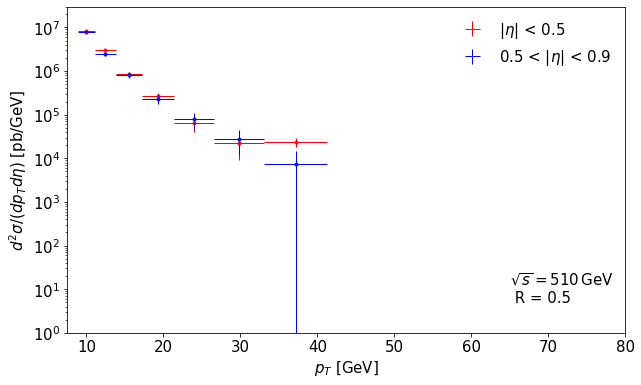

In [16]:
fig = plt.figure(figsize=(10,6))
plt.errorbar(x1, y1*xsec*1e9/(2*ntrials*xerr*1), xerr = xerr, yerr = yerr*xsec*1e9/(2*ntrials*xerr*1),\
             fmt='none', color='r', elinewidth=1, label='|$\eta$| < 0.5')
plt.plot(x1, y1*xsec*1e9/(2*ntrials*xerr*1), 'r.', fillstyle='none')
plt.errorbar(x2, y2*xsec*1e9/(2*ntrials*xerr*0.8), xerr = xerr, yerr = yerr*xsec*1e9/(2*ntrials*xerr*0.8),\
             fmt='none', color='b', elinewidth=1, label='0.5 < |$\eta$| < 0.9')
plt.plot(x2, y2*xsec*1e9/(2*ntrials*xerr*0.8), 'b.', fillstyle='none')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.yscale('log')
plt.xlabel('$p_T$ [GeV]', fontsize=15)
plt.ylabel(r'$d^2 \sigma / (dp_T d \eta)$ [pb/GeV]', fontsize=15)
plt.xlim(left=7.5, right=80)
plt.ylim(top=3e7, bottom=1)
plt.legend(prop={'size': 15}, frameon=False, loc='best')
plt.text(65,5,'$\sqrt{s} = 510 \, \mathrm{GeV}$ \n R = 0.5', fontsize=15)

Text(25, 5, '$\\sqrt{s} = 510 \\, \\mathrm{GeV}$ \n R = 0.5')

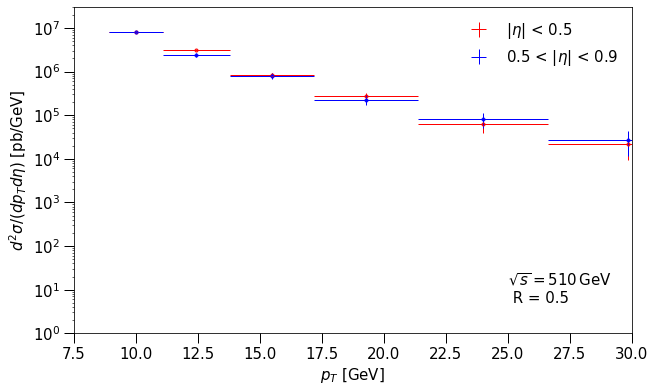

In [17]:
fig = plt.figure(figsize=(10,6))
plt.errorbar(x1, y1*xsec*1e9/(2*ntrials*xerr*1), xerr = xerr, yerr = yerr*xsec*1e9/(2*ntrials*xerr*1),\
             fmt='none', color='r', elinewidth=1, label='|$\eta$| < 0.5')
plt.plot(x1, y1*xsec*1e9/(2*ntrials*xerr*1), 'r.', fillstyle='none')
plt.errorbar(x2, y2*xsec*1e9/(2*ntrials*xerr*0.8), xerr = xerr, yerr = yerr*xsec*1e9/(2*ntrials*xerr*0.8),\
             fmt='none', color='b', elinewidth=1, label='0.5 < |$\eta$| < 0.9')
plt.plot(x2, y2*xsec*1e9/(2*ntrials*xerr*0.8), 'b.', fillstyle='none')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.tick_params('both', length=10, width=1, which='major')
plt.yscale('log')
plt.xlabel('$p_T$ [GeV]', fontsize=15)
plt.ylabel(r'$d^2 \sigma / (dp_T d \eta)$ [pb/GeV]', fontsize=15)
plt.xlim(left=7.5, right=30)
plt.ylim(top=3e7, bottom=1)
plt.legend(prop={'size': 15}, frameon=False, loc='best')
plt.text(25,5,'$\sqrt{s} = 510 \, \mathrm{GeV}$ \n R = 0.5', fontsize=15)